In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

keras.__version__

Using TensorFlow backend.


'2.3.1'

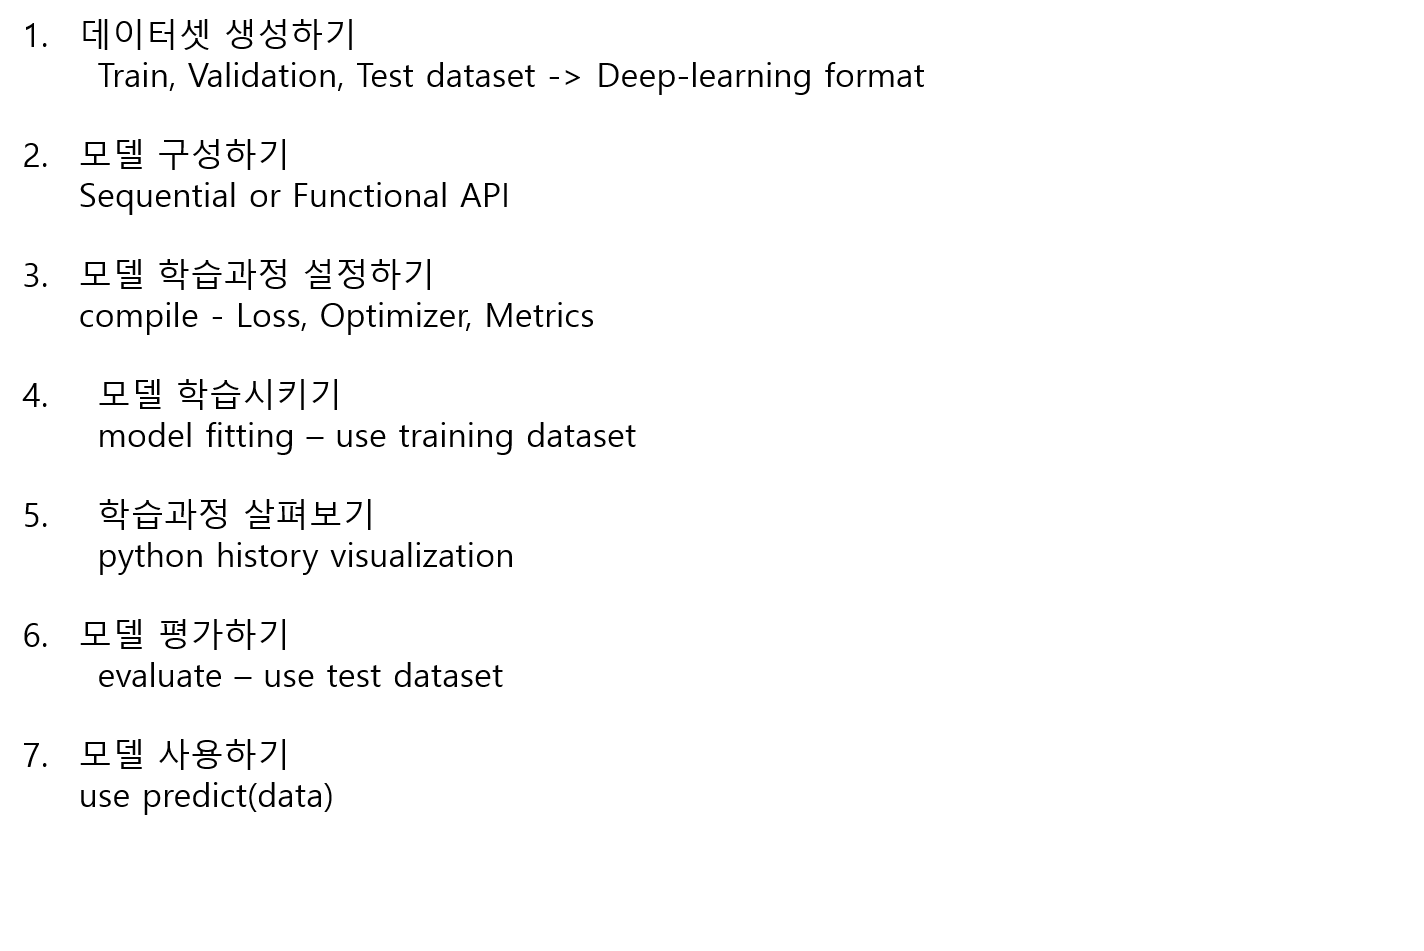

In [2]:
Image("flow-chart.png")

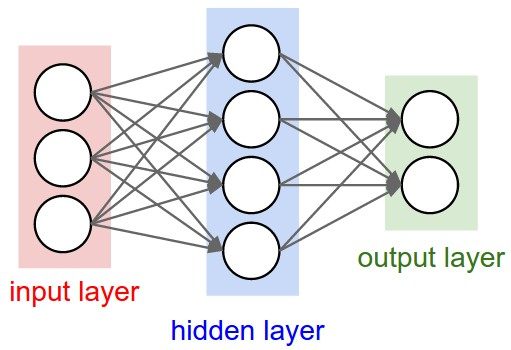

In [3]:
# MLP
Image("1.jpeg")

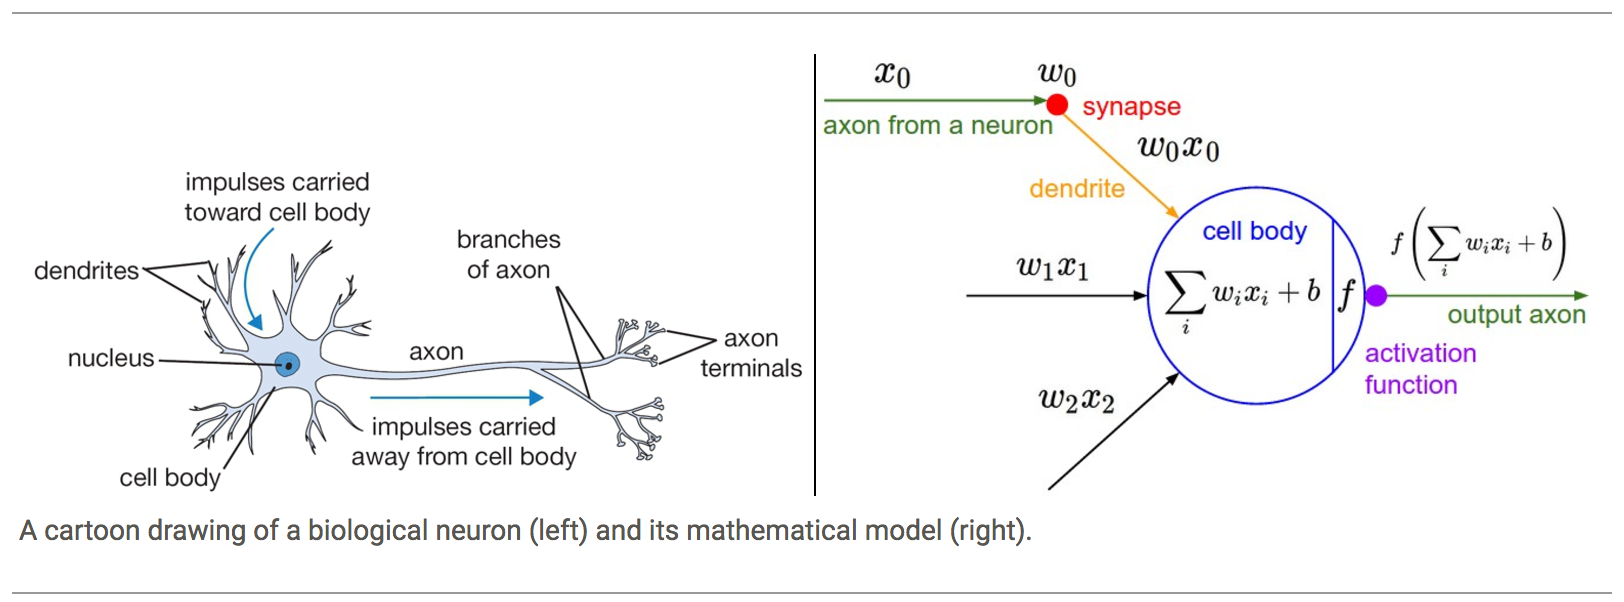

In [4]:
# 신경망 내부
Image("2.png")

# 1. keras.layers

In [ ]:
np.ndarray()
image = (224, 224, 3)

In [6]:
from keras import layers

"""
`Input()` is used to instantiate a Keras tensor.
"""
input_layer = layers.Input(shape = (64,)) 

"""
Dense
Input shape
: N-D tensor with shape: (batch_size, ..., input_dim). 
The most common situation would be a 2D input with shape (batch_size, input_dim).

Output shape
: N-D tensor with shape: (batch_size, ..., units). 
For instance, for a 2D input with shape (batch_size, input_dim), 
the output would have shape (batch_size, units).
"""

fc = layers.Dense(
    units = 64,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)(input_layer)



activation = layers.Activation(activation = 'relu')(input_layer) # non-linearity


""" 
Embedding
2D tensor with shape: (batch_size, input_length).
Output shape: 3D tensor with shape: (batch_size, input_length, output_dim).
"""
embedding = layers.Embedding(
    input_dim = 64,    # input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
    output_dim = 10,                # output_dim: Integer. Dimension of the dense embedding.
    embeddings_initializer="uniform",
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None
)(input_layer)

# print(embedding(input_layer))

lambda_layer = layers.Lambda(
     lambda x: x ** 2, output_shape=None, mask=None, arguments=None
)

print(lambda_layer(input_layer))


Tensor("lambda_1/pow:0", shape=(None, 64), dtype=float32)


# 2. Keras Model(Sequential)

In [9]:
from keras import Sequential

model = Sequential()

### model.add() method

In [10]:
model.add(layers.Dense(100, input_shape = (64, ))) # 첫번째 layer에는 input_shape을 설정해주는 것이 중요
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
Total params: 6,500
Trainable params: 6,500
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Dense(100, name= 'h1')) 
model.add(layers.Activation('sigmoid', name= 'h1_sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
h1 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h1_sigmoid (Activation)      (None, 100)               0         
Total params: 16,600
Trainable params: 16,600
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Dense(64, name= 'h2'))
model.add(layers.Activation('relu', name= 'h2_relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
h1 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h1_sigmoid (Activation)      (None, 100)               0         
_________________________________________________________________
h2 (Dense)                   (None, 64)                6464      
_________________________________________________________________
h2_relu (Activation)         (None, 64)                0         
Total params: 23,064
Trainable params: 23,064
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(layers.Lambda(
     lambda x: x ** 2, output_shape=None, mask=None, arguments=None, name= 'lambda'
))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
h1 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h1_sigmoid (Activation)      (None, 100)               0         
_________________________________________________________________
h2 (Dense)                   (None, 64)                6464      
_________________________________________________________________
h2_relu (Activation)         (None, 64)                0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 64)                0         
_________________________________________________________________
lambda (Lambda)              (None, 64)               

#### model.get_layer() Method
: get the name layers in the model

In [16]:
h2_layer = model.get_layer('h2')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
h1 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h1_sigmoid (Activation)      (None, 100)               0         
_________________________________________________________________
h2 (Dense)                   (None, 64)                6464      
_________________________________________________________________
h2_relu (Activation)         (None, 64)                0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 64)                0         
_________________________________________________________________
lambda (Lambda)              (None, 64)               

In [17]:
print(h2_layer)

In [18]:
model.pop()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
h1 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h1_sigmoid (Activation)      (None, 100)               0         
_________________________________________________________________
h2 (Dense)                   (None, 64)                6464      
_________________________________________________________________
h2_relu (Activation)         (None, 64)                0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 64)                0         
Total params: 23,064
Trainable params: 23,064
Non-trainable params: 0
__________________________________________________

# 3. loss

In [18]:
# https://keras.io/api/losses/

# Classification
model.compile(loss="binary_crossentropy", optimizer='sgd', metrics= ['accuracy'])
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics= ['accuracy'])
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics= ['accuracy'])

# Regression
model.compile(loss="mean_squared_error", optimizer='sgd')
model.compile(loss="mean_absolute_error", optimizer='sgd')
model.compile(loss="mean_absolute_percentage_error", optimizer='sgd')
model.compile(loss="mean_squared_logarithmic_error", optimizer='sgd')
model.compile(loss="cosine_similarity", optimizer='sgd')

# 4. optimizer

- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam


In [22]:
model.compile(loss="binary_crossentropy", optimizer='Adam')

In [25]:
# Learning rate decay / scheduling

sgd = keras.optimizers.SGD(learning_rate=0.15, decay = 23/15)
adam = keras.optimizers.Adam(learning_rate=0.02, decay = 1e-2/3)
adagrad = keras.optimizers.Adagrad(learning_rate=0.02, decay = 1e-2/3)

model.compile(loss="binary_crossentropy", optimizer=sgd)
model.compile(loss="binary_crossentropy", optimizer=adam)
model.compile(loss="binary_crossentropy", optimizer=adagrad)

# 5. metrics

1. Accuracy metrics
- Accuracy class
- BinaryAccuracy class
- CategoricalAccuracy class
- TopKCategoricalAccuracy class
- SparseTopKCategoricalAccuracy class
2. Probabilistic metrics
- BinaryCrossentropy class
- CategoricalCrossentropy class
- SparseCategoricalCrossentropy class
- KLDivergence class
- Poisson class
3. Regression metrics
- MeanSquaredError class
- RootMeanSquaredError class
- MeanAbsoluteError class
- MeanAbsolutePercentageError class
- MeanSquaredLogarithmicError class
- CosineSimilarity class
- LogCoshError class

In [26]:
# https://keras.io/api/metrics/
# Accuracy metrics
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[keras.metrics.Accuracy()])

model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=["accuracy"])

# Probabilistic metrics
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[keras.metrics.BinaryCrossentropy()])

model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=["binary_crossentropy"])

# Regression metrics
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[keras.metrics.MeanSquaredError()])

model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=["mean_squared_error"])

# 6. Conclusion

In [27]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print("The train_data shape is", (x_train.shape, y_train.shape))
print("The train_data shape is", (x_test.shape, y_test.shape))

The train_data shape is ((404, 13), (404,))
The train_data shape is ((102, 13), (102,))


In [38]:
# model 선언
model = Sequential()

# 선언된 model에 layer를 추가합니다.
model.add(layers.Dense(64, input_shape = (13,), name= 'input'))
model.add(layers.Activation('relu', name= 'relu1'))

model.add(layers.Dense(64, name= 'h1'))
model.add(layers.Activation('relu', name= 'relu2'))

model.add(layers.Dense(32, name= 'h2'))
model.add(layers.Activation('relu', name= 'relu3'))

model.add(layers.Dense(1, name= 'h3'))
model.add(layers.Activation('sigmoid'))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'sgd')
model.summary()
model.fit(x_train, y_train)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                896       
_________________________________________________________________
relu1 (Activation)           (None, 64)                0         
_________________________________________________________________
h1 (Dense)                   (None, 64)                4160      
_________________________________________________________________
relu2 (Activation)           (None, 64)                0         
_________________________________________________________________
h2 (Dense)                   (None, 32)                2080      
_________________________________________________________________
relu3 (Activation)           (None, 32)                0         
_________________________________________________________________
h3 (Dense)                   (None, 1)                